# Exercise 5: Artificial Neural Network
## By Jakub Tomkiewicz and Konrad Piotrowski

The task is to implement an N-layer perception for Iris classification in Python and verify how a number of layers affect final metrics.

We used two popular Python libraries in our work:
* **TensorFlow** - provides tools for machine learning and artificial intelligence
* **Keras** - provides an interface for handling neural networks

In [29]:
import pandas as pd

data = pd.read_csv('iris.csv')

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The distribution shows that we have 150 flowers divided equally (50 pieces) among each of the three species.

In [30]:
group = data.groupby('Species').size()

print(group)

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


The 'Id' column does not introduce anything important, so we can delete it. We map species written in strings so that they are presented as numbers.

In [31]:
data = data.drop('Id', axis=1)

data.loc[data['Species'] == 'Iris-setosa', 'Species'] = 0
data.loc[data['Species'] == 'Iris-versicolor', 'Species'] = 1
data.loc[data['Species'] == 'Iris-virginica', 'Species'] = 2

data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


The species column still has 'object' as type, so we replace its type with an integer, as it now only contains 0, 1 and 2.

In [32]:
print(data.dtypes)

data = data.apply(pd.to_numeric)

print()
print(data.dtypes)

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object


With the help of the matplotlib library, we can quickly see how the comparison of the length and width of the petal and the sepal looks on the chart.

Legend:
Violet - Iris-setosa
Green - Iris-versicolor
Yellow - Iris-virginica


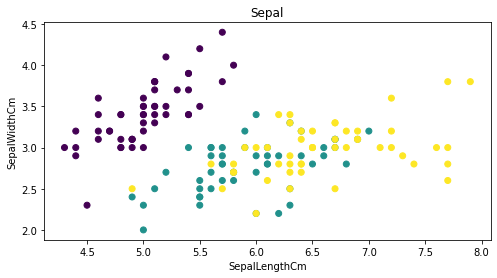

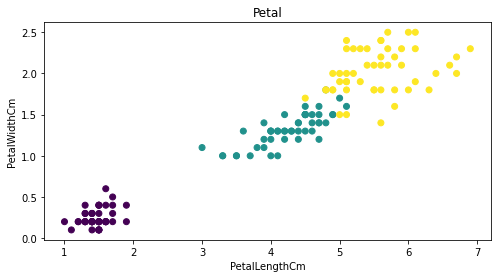

In [33]:
import matplotlib.pyplot as plt

print('Legend:')
print('Violet - Iris-setosa')
print('Green - Iris-versicolor')
print('Yellow - Iris-virginica')

plt.figure(figsize=(8, 4))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c = data['Species'])
plt.title('Sepal')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(data.iloc[:, 2], data.iloc[:, 3], c = data['Species'])
plt.title('Petal')
plt.xlabel(data.columns[2])
plt.ylabel(data.columns[3])
plt.show()

As x data, we treat the first four columns that contain heights and widths of the petal and the sepal. Species is y data.

In [34]:
data_array = data.values

x_data = data_array[:, :4]
y_data = data_array[:, 4]

80% of our set (exactly 120 tuples) are used for learning, and 20% (the remaining 30 tuples) are used for testing.

In [35]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.2)

ss = StandardScaler()

train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)
train_y = tf.keras.utils.to_categorical(train_y)

To simplify the testing of various neural network models, we wrote a function that performs training, testing, and printing the obtained results.

Function takes two parameters: 
* network model 
* loss function (also called cost function)

Function outputs three values:
* **Accuracy** - the probability of correct classification outcome
* **Precision** - the quality of a positive prediction made by the model (the number of true positives divided by the sum of true positives and false positives)
* **Recall** - the ability to detect positive samples (the number of true positives divided by the sum of true positives and false negatives)

In [36]:
import numpy as np
from sklearn.metrics import classification_report

def train_test_model(model, loss_object):
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

    n = 500
    loss = 0

    for i in range(n):
        with tf.GradientTape() as tape:
            predictions = model(train_x)
            loss = loss_object(train_y, predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    print(f'Loss: {loss}')

    pred = np.argmax(model(test_x), axis=1)

    accuracy = np.sum(pred == test_y)/len(test_y) * 100

    print(f'Accuracy: {accuracy}%')

    print('Prediction:')
    print(pred)

    print('Target:')
    print(np.asarray(test_y).astype('int64'))  

    print(classification_report(test_y, pred))

### Neural net design 
In all our test cases, the design of the neural nets is similar. The only thing we are changing between the cases is the number of hidden layers.

* **input layer** - the size of the input layer needs to be the same as the number of features, so in our case, it is 4
* **hidden layer** - for our hidden layer, we decided to use a size equal to 10
* **output layer** - the output layer needs to have the number of neurons equal to the number of classification outcomes, so in this case, it is 3

### Mean squared error
The mean squared errors definition is pretty self-explanatory. It is the mean value of squared differences between the actual value and the estimation made by the model.

The first test case for MSE is a neural network with a single hidden layer.

In [47]:
input_layer = tf.keras.layers.Input(shape=(4,))
hidden_layer1 = tf.keras.layers.Dense(units=10, activation=tf.nn.relu)(input_layer)
output_layer = tf.keras.layers.Dense(units=3, activation=tf.nn.softmax)(hidden_layer1)

train_test_model(tf.keras.Model(input_layer, output_layer), tf.keras.losses.MeanSquaredError())

loss: 0.03244296833872795
Accuracy: 93.33333333333333%
Prediction:
[0 2 1 1 2 0 1 1 2 0 1 2 2 2 1 2 2 0 1 2 2 0 0 0 1 1 1 2 1 2]
Target:
[0 2 1 1 2 0 1 2 2 0 1 2 2 2 1 2 1 0 1 2 2 0 0 0 1 1 1 2 1 2]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.91      0.91      0.91        11
         2.0       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



The second case is a net with two hidden layers.

In [48]:
input_layer = tf.keras.layers.Input(shape=(4,))
hidden_layer1 = tf.keras.layers.Dense(units=10, activation=tf.nn.relu)(input_layer)
hidden_layer2 = tf.keras.layers.Dense(units=10, activation=tf.nn.relu)(hidden_layer1)
output_layer = tf.keras.layers.Dense(units=3, activation=tf.nn.softmax)(hidden_layer2)

train_test_model(tf.keras.Model(input_layer, output_layer), tf.keras.losses.MeanSquaredError())

loss: 0.018980512395501137
Accuracy: 93.33333333333333%
Prediction:
[0 2 1 1 2 0 1 1 2 0 1 2 1 2 1 2 1 0 1 2 2 0 0 0 1 1 1 2 1 2]
Target:
[0 2 1 1 2 0 1 2 2 0 1 2 2 2 1 2 1 0 1 2 2 0 0 0 1 1 1 2 1 2]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.85      1.00      0.92        11
         2.0       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



Lastly, we used a net with three hidden layers.

In [49]:
input_layer = tf.keras.layers.Input(shape=(4,))
hidden_layer1 = tf.keras.layers.Dense(units=10, activation=tf.nn.relu)(input_layer)
hidden_layer2 = tf.keras.layers.Dense(units=10, activation=tf.nn.relu)(hidden_layer1)
hidden_layer3 = tf.keras.layers.Dense(units=10, activation=tf.nn.relu)(hidden_layer2)
output_layer = tf.keras.layers.Dense(units=3, activation=tf.nn.softmax)(hidden_layer3)

train_test_model(tf.keras.Model(input_layer, output_layer), tf.keras.losses.MeanSquaredError())

loss: 0.021601490676403046
Accuracy: 93.33333333333333%
Prediction:
[0 2 1 1 2 0 1 1 2 0 1 2 1 2 1 2 1 0 1 2 2 0 0 0 1 1 1 2 1 2]
Target:
[0 2 1 1 2 0 1 2 2 0 1 2 2 2 1 2 1 0 1 2 2 0 0 0 1 1 1 2 1 2]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.85      1.00      0.92        11
         2.0       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [50]:
input_layer = tf.keras.layers.Input(shape=(4,))
hidden_layer1 = tf.keras.layers.Dense(units=10, activation=tf.nn.relu)(input_layer)
output_layer = tf.keras.layers.Dense(units=3, activation=tf.nn.softmax)(hidden_layer1)

train_test_model(tf.keras.Model(input_layer, output_layer), tf.keras.losses.BinaryCrossentropy())

loss: 0.06972547620534897
Accuracy: 93.33333333333333%
Prediction:
[0 2 1 1 2 0 1 1 2 0 1 2 1 2 1 2 1 0 1 2 2 0 0 0 1 1 1 2 1 2]
Target:
[0 2 1 1 2 0 1 2 2 0 1 2 2 2 1 2 1 0 1 2 2 0 0 0 1 1 1 2 1 2]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.85      1.00      0.92        11
         2.0       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [51]:
input_layer = tf.keras.Input(shape=(4,))
hidden_layer1 = tf.keras.layers.Dense(units=10, activation=tf.nn.relu)(input_layer)
hidden_layer2 = tf.keras.layers.Dense(units=10, activation=tf.nn.relu)(hidden_layer1)
output_layer = tf.keras.layers.Dense(units=3, activation=tf.nn.softmax)(hidden_layer2)

train_test_model(tf.keras.Model(input_layer, output_layer), tf.keras.losses.BinaryCrossentropy())

loss: 0.03759516775608063
Accuracy: 93.33333333333333%
Prediction:
[0 2 1 1 2 0 1 1 2 0 1 2 1 2 1 2 1 0 1 2 2 0 0 0 1 1 1 2 1 2]
Target:
[0 2 1 1 2 0 1 2 2 0 1 2 2 2 1 2 1 0 1 2 2 0 0 0 1 1 1 2 1 2]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.85      1.00      0.92        11
         2.0       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [52]:
input_layer = tf.keras.Input(shape=(4,))
hidden_layer1 = tf.keras.layers.Dense(units=20, activation=tf.nn.relu)(input_layer)
hidden_layer2 = tf.keras.layers.Dense(units=10, activation=tf.nn.relu)(hidden_layer1)
hidden_layer3 = tf.keras.layers.Dense(units=10, activation=tf.nn.relu)(hidden_layer2)
output_layer = tf.keras.layers.Dense(units=3, activation=tf.nn.softmax)(hidden_layer3)

train_test_model(tf.keras.Model(input_layer, output_layer), tf.keras.losses.BinaryCrossentropy())

loss: 0.032177139073610306
Accuracy: 93.33333333333333%
Prediction:
[0 2 2 1 2 0 1 1 2 0 1 2 2 2 1 2 1 0 1 2 2 0 0 0 1 1 1 2 1 2]
Target:
[0 2 1 1 2 0 1 2 2 0 1 2 2 2 1 2 1 0 1 2 2 0 0 0 1 1 1 2 1 2]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.91      0.91      0.91        11
         2.0       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

